### Homework 5
Dieu My Nguyen | MCDB 5520 | April 13, 2018 

<b>1\.  You and your lab mate, Eugene Yous, are performing expression-profiling experiments using RNA-Seq. You have extracted mRNA from a mouse liver. Both you and Eugene profile the same exact mRNA sample, but you decide to use polyT primer to make your cDNA whereas Eugene decides to use random priming. You obtain the exact same results across the genome except at one locus, the gene Ipt25. You find 250 reads map to Ipt25 whereas Eugene finds 45,000 reads mapping to Ipt25. </b>

<b>(a)	(3pt) Propose an explanation for the discrepancy.</b>

The polyT primer binds to the poly(A) tail of mRNA and is phosphorylated on the 5’ end. It’s possible that this primer led to incomplete cDNA since it initiates reverse transcription at the 3’ end of the transcript. Random priming could produce cDNA scattered all over the mRNA, and these shorter cDNA fragments are not full-length but numerous. 

<b>(b)	(4pt) After scaling both data sets so that the total number of reads are identical in both yours and Eugene's experiments (e.g. RPKM), what will be the effect of the difference in Ipt25 expression on the observed expression of all the OTHER genes? </b>

RPKM normalizes sequencing depth, then gene length. The limitation of RPKM is that if a large number of genes is highly expressed in one experiment, the expression values of the other genes will be decreased. 

<b>(c)	(3pt) Suggest an alternative normalization scheme that is more appropriate for this problem.</b>

Transcripts per million (PM) is more consistent across samples. We normalize for gene length first, then normalize for sequencing depth. The sum of all TPKs in a sample are the same, so we can better compare the proportion of reads that map to a gene. 

<b>2. Consider RNA-seq experiments where you are comparing two samples.</b>

<b>(a) (5pt) First, you compare human cells grown in glucose to cells grown in galactose. Gene A changes 10-fold between these two conditions and Gene B changes 1.2-fold. Explain how it could be that the 10-fold change is statistically insignificant whereas the
1.2-fold change is statistically significant.</b>

Fold change is calculated based on the ratios of the means of the groups across the two conditions. It doesn’t account for variability within groups, making possible that a small fold change can be significant (low p value). 

<b>(b) (5pt) In the second, you are comparing the expression from a benign tumor to the normal adjacent cells. You have run RNA-seq in duplicate and determined that the oncogene ohNo1 is dramatically overexpressed in the tumor. However, upon closer examination, the two replicates give very different estimates for OhNo1, so you decide to do more replicates. Across many replicates it is clear that OhNo1 expression levels arehighly variable in both the tumor and normal cells.   How does this knowledge influence your original conclusion that OhNo1 is overexpressed? </b>

Replicates provide information about variability within groups, so the more the better statistical inference of differences between groups we can make. If we’ve run statistical tests on the replicates and find that OhNo1 expression is variable in both tumor and normal cells, we have reason to discard our original conclusion that this gene is overexpressed in cancer cells. Some nuances though: We have to make sure those adjacent cells are truly normal and not affected by the tumor cells due to proximity. Moreoever, it’s not stated whether the replicates are technical or biological, but in either case we must control for identical conditions (environment, cell samples, time, etc). Lastly, we should find out if OhNo1 is also “overexpressed” in the normal cells, or whether these cells simply have variable expression levels. 

<b>3. (10pts) You are looking to find regions of statistically significant differential expression, you consider two distinct ways of looking at the problem.  In the first, you look at all windows of length 10 kb.   In the second, you consider only the 20,000 annotated protein coding genes.   Give the pros and cons of these two approaches, being sure to comment on how the desired statistical cutoff is influenced by testing multiple regions. (Recall that
the human genome is 3.0 ×109  bp.) </b>

Approach 1: We may discover differential expression outside of previously known/annotated genes capable of expressing transcripts. This method also aims to fully quantify the potential isoforms of mRNAs. However, the ambiguity and variability incurred in this approach may complicate statistical analysis of differential expression. The short length of sequencing reads make it difficult to determine which of the assembled transcripts generated the RNA-seq data. Plus, this approach is more expensive in time and computing cost. 

Approach 2: This provides a straightforward, interpretable, and less computationally expensive analysis, but we cannot discover differential expression outside of previously known genes. We’d also have to rely on the accuracy of annotation databases of gene and exon boundaries. Moreover, some genes can produce several transcripts through the process of alternative splicing, and we want to capture these multiple transcripts for individual genes.   

We could execute a t test to test one region, but the goal is to generate a list of genes that have significant differential expression. If we allow the Type I error threshold of 0.05, we can expect 5% false positives. With many independent tests for all the regions, the percentage of false positives may overwhelm the true positives and make the analysis useless. In approach 1, this might be a relatively bigger issue than with approach 2, in which we probably look at fewer regions of only annotated genes.

<b>4.   Consider the following gene structure:

Exons are number (1-4) and sizes are given (e.g. exon 1 is of size 120 nts).  The transcript can initiate (begin) at either arrow and exons 2 and/or 3 can be spliced out (noted by dotted splice junctions). Exons are number (1-4) and sizes are given (e.g. exon 1 is of size 120 nts).  The transcript can initiate (begin) at either arrow and exons 2 and/or 3 can be spliced out (noted by dotted splice junctions).  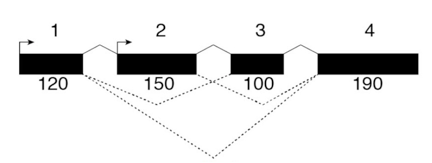

<b>(a)	(2pt) How many possible isoforms of this gene could exist? </b>

6 isoforms total: <br>
1-2-3-4 <br>
1-2-4 <br>
1-3-4 <br>
1-4 <br>
2-3-4 <br>
2-4 <br>

<b>(b)	(4pt) For each isoform, list the junction spanning RNA-seq read that would support its existence.</b>

1-2-3-4: 1-2, 2-3, 3-4 spanning reads <br>
1-2-4: 1-2, 2-4 spanning reads<br>
1-3-4: 1-3, 3-4 spanning reads<br>
1-4: 1-4 spanning reads<br>
2-3-4: 2-3, 3-4 spanning reads<br>
2-4: 2-4 spanning reads

<b>(c)	(4pt) It was noted in class that longer read lengths will reduce the need for isoform inference algorithms.  Assuming only single end reads, what is the shortest read length that would guarantee the ability to unambiguously identify all isoforms of this gene?  For this question we require that a junction read must capture at least 5 bp of each adjacent exon. </b>

We have 150bp for exon 2, 100bp for exon 3, and 5bp each for exons 1 and 4. So, shortest read length: 260bp. 


<b>5. Random short answer questions:

(a)	(3pt)  Explain what overdispersion is in RNA-seq data.</b>

Variance grows faster than the mean in RNA-seq data, usually occurring in biological replicates. We can use negative binomial distribution to capture overdispersion as this form of the Poisson distribution allows the variance to exceed the mean. 


<b>(b) (4pt) Explain why small indels often appear as SNP dense regions after an initial read mapping.</b>

Both indels and SNPs are nucleotide-level variants. SNPs and indels make up most of the variants detected. Short indels also may be not significantly longer than a single nucleotide. Moreover, we should also note that initial read mapping data is noisy and may contain many artifacts, requiring filtering for true variants.

<b> (c) (3pt)  For each of these problems, which technique is best: nascent transcription or RNA-seq and why? </b>

<b>i.	Identifying the immediate transcriptional targets of a perturbation. </b><br>
Gro-seq to measure nascent RNA and show nascent transcription. RNA-seq only measures steady-state level of a given RNA (the equilibrium between transcription, processing, and degradation). So using RNA-seq, we wouldn’t know if changes in the steady state after perturbation really mean transcriptional changes. Gro-seq isolates and sequence nascent RNA before the RNA degrades as what happens in RNA-seq. 

<b>ii.	Identifying isoforms utilized.</b><br>
RNA-seq, whose data can facilitate discovery of novel transcripts, identification of alternatively spliced genes, and detection of allele specific expression. It can map reads to the reference genome, detect alterative splicing isoforms, and the changes of splicing under different conditions. 

<b>iii.	Detecting alternative 3’ end (cleavage site) usage.</b><br>
RNA-seq lets us look at alternative cleavage site usage for alternative splicing. RNA-seq data allows analysis of unannotated and complex splice events. From this data, we could use genome-guided methods to predict and quantify splice events from reads mapped to a reference genome and assembled into a genome-wide splice graph. 


<b>6. (Advanced) Watch Lior Pachter’s 2013 Keynote at Genome Informatics:
https://youtu.be/5NiFibnbE8o

Entitled, “Stories from the Supplement”.  (Note that the sound quality is a bit poor, and the lecture is roughly 47 minutes in length.) Then answer the following questions based on Dr. Pachter’s lecture:</b>

<b>a)	According to Pachter, what are the two fundamental problems necessary to solve the inverse problem?  (He says this is a chicken and egg problem.)</b>

Fragment assignment: find the target sequence and position in that target that the read originated from.<br>
Density deconvolution: estimate the number of reads that originated from a position in every target sequence.


<b>b)	Pachter says that throwing away ambiguous data isn’t a bad way to get an estimate on the expression levels of genes, but what does he state is the problem with this approach?</b>

We’d greatly increase the variance on the estimate and thus it will be noisy. 


<b>c)	How big is the *Seq list that Pachter maintains?  Note I’m looking for the length
TODAY (at the time of the talk he says it is 52).</b>

92 today!

<b>d)	What does Pachter mean by “No sample is an island”?  Why is this useful from a computational stand point?</b>

On the surface, samples look like different experiments, but underneath they’re interconntected because they have mostly the same transcript abundances. 

<b>e)	Define impute (a word Pachter uses) and explain why he says “it will make you queasy”.</b>

Fill in missing data with substituted data. Here, he imputed the actual expression level for the experiments. It’ll make you queasy because it’s statistics. 

<b>f)	Why is RPKM/FPKM a metric he doesn’t like?  (Even though he was the one who introduced FPKM!)  So what metric is better? </b>

The proportionality constant depends on the actual experiment. And the normalization factor depends on the actual abundances of the experiments. For 2 experiments/conditions in which we use FPKM, the proportionality constants are different. TPM is better, taking rho itself. 

<b>g)	What is the major complaint that Pachter has about peer review in bioinformatics?</b>

Papers’ supplements are not actually reviewed, although the supplementary section is where the methods and ideas are. Only 10 equations allowed?!